<a href="https://colab.research.google.com/github/om-369/NLP-GEN-AI/blob/main/TopicModelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Topic modelling

In [ ]:
# Topic modelling vs text classification
# Topic modelling vs clustering

In [ ]:
#  application

# sports : cricket , football, ipl, olympics
#  politics : election , minister
#  science : nasa, isro, research

In [ ]:
# LDA : latent dirichlet allocation

# latent ---> hidden
# dirichet ---> distribution
# allocation ---> assignment

In [ ]:
dataset :

doc1 ---> [cricket , ipl , vs]
doc2 ---> [word1, word2]
doc3 --->[fo,word2 ..]

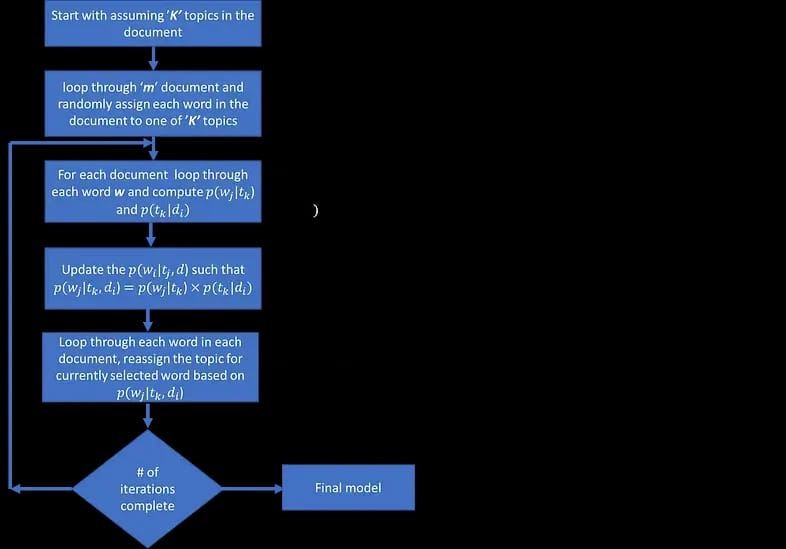

In [ ]:
from IPython.display import Image,display
display(Image("/content/LDA.jpg"))

In [ ]:
#  Topic modelling using gensim


In [ ]:
import pandas as pd
import gensim

In [ ]:
df = pd.read_csv('/content/Tweets_Tokyo_2020.csv')

In [ ]:
df.head(5)

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [ ]:
df['text']

0                         Let the party begin\n#Tokyo2020
1       Congratulations #Tokyo2020 https://t.co/8OFKMs...
2       Big Breaking Now \n\nTokyo Olympic Update \n\n...
3       Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...
4       All I can think of every time I watch the ring...
                              ...                        
5995    https://t.co/R4FLGUP5i8\nClick on the link abo...
5996    Congratulations to #MirabaiChanu \n\nWe are pr...
5997    With TONAKI Funa🇯🇵 and TAKATO Naohisa🇯🇵 advanc...
5998    @PuneethRajkumar @mirabai_chanu Boss\n\n#Dvitv...
5999    4 goals for Shuang Wang, might as have well st...
Name: text, Length: 6000, dtype: object

In [ ]:
docs = df['text'].to_list()

In [ ]:
docs[100]

"It's a huge upset for  #TeamIndia as Vikas Krishan is eliminated in first round itself in #Boxing at #Tokyo2020… https://t.co/Tz6zRMXSSt"

In [ ]:
docs[56]

"𝐎𝐅𝐅 𝐖𝐄 𝐆𝐎 😍\n\n1st medal comes home as @mirabai_chanu wins 🥈 in women's 49kg weightlifting. BFI congratulates her for… https://t.co/PbFvNtR38O"

In [ ]:
docs[344]

'Janasena chief @PawanKalyan congratulates\nweightlifter @mirabai_chanu on winning\nsilver medal at Olympics 👏… https://t.co/xlQXZngWyR'

In [ ]:
# remove url
#  remove emojis
# remove username
# remove punctuations
# lowercase
# remove stopwords
# lemmatize

In [ ]:
import re

In [ ]:
from string import punctuation

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
cleaned_text = []
for sent in docs:
  sent = sent.lower()
  sent = re.sub(r'https\S','',sent)    #url
  sent = re.sub(r'@[\w\d_]','',sent)   # username
  sent = re.sub(r'#[\w\d_]','',sent)

  # sent = sent.lower()
  tokens = word_tokenize(sent)
  sent = sent.translate(str.maketrans('','',punctuation))
  sent = [char for char in sent if char not in punctuation]

  tokens = [token for token in tokens if token.isalpha()]
  tokens = [token for token in tokens if token not in stopwords]

  cleaned_text.append(tokens)

In [ ]:
# re.sub(r'https\S','',sent)    #url

In [ ]:
# re.sub(r'@[\w\d_]','',sent) # username

In [ ]:
# [token for token in sent.split() if token.isaplha()]

In [ ]:
# import re

In [ ]:
# from string import punctuation

In [ ]:
# punctuation

In [ ]:
# sent = 'mirabai_chanu on winning\nsilver %$ medal at Olympics'

In [ ]:
# sent = ''.join[char for char in sent if char not in punctuation]

In [ ]:
# sent.translate(str.maketrans('','',punctuation))

In [ ]:
cleaned_text[0]

['let', 'party', 'begin']

In [ ]:
cleaned_text[100]

['huge',
 'upset',
 'eamindia',
 'vikas',
 'krishan',
 'eliminated',
 'first',
 'round',
 'oxing']

In [ ]:
dataset = [[sent1],[sent2]]

In [ ]:
from gensim import corpora

In [ ]:
from gensim.models import LdaModel

In [ ]:
dictionary = corpora.Dictionary(cleaned_text)

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in cleaned_text]
lda_model = LdaModel(corpus=corpus,id2word=dictionary, num_topics=10, passes =10)

In [ ]:
lda_model.print_topics()

[(0,
  '0.021*"love" + 0.013*"lympics" + 0.011*"would" + 0.008*"swimming" + 0.008*"win" + 0.008*"get" + 0.008*"anyone" + 0.007*"amp" + 0.007*"absolutely" + 0.007*"nice"'),
 (1,
  '0.084*"congratulations" + 0.077*"medal" + 0.056*"india" + 0.052*"silver" + 0.043*"first" + 0.042*"irabaichanu" + 0.037*"winning" + 0.036*"proud" + 0.035*"women" + 0.028*"uneethrajkumar"'),
 (2,
  '0.062*"tokyo" + 0.049*"olympics" + 0.039*"first" + 0.015*"medal" + 0.014*"gold" + 0.012*"wins" + 0.011*"sweden" + 0.011*"olympic" + 0.009*"australia" + 0.008*"india"'),
 (3,
  '0.024*"second" + 0.020*"lympics" + 0.013*"gold" + 0.013*"rule" + 0.012*"heat" + 0.010*"remedy" + 0.010*"let" + 0.009*"udo" + 0.009*"butterfly" + 0.008*"distria"'),
 (4,
  '0.017*"lympics" + 0.015*"go" + 0.013*"team" + 0.011*"great" + 0.011*"olympics" + 0.010*"smith" + 0.009*"hematildas" + 0.008*"live" + 0.008*"swim" + 0.007*"follow"'),
 (5,
  '0.022*"best" + 0.020*"good" + 0.017*"lympics" + 0.015*"olympics" + 0.012*"luck" + 0.011*"india" + 0.

In [ ]:
from IPython.display import Image,display
display(Image("/content/LDA.jpg"))